<a href="https://colab.research.google.com/github/ujjwaltrivedi-dotcom/titanic-data-cleaning/blob/main/titanic_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
 df=pd.read_excel('Titanic Data Cleaning.xlsx')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df[['Age','Cabin','Embarked']].isnull().sum()

,0
Age,177
Cabin,687
Embarked,2


In [ ]:
import numpy as np
df[['Age','Cabin','Embarked']] = df[['Age','Cabin','Embarked']].astype(object).where(
    pd.notnull(df[['Age','Cabin','Embarked']]), np.nan)

In [ ]:
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [ ]:
#  define imputer
age_imputers = SimpleImputer(strategy='mean')               #for numeric
cabin_imputers = SimpleImputer(strategy='most_frequent')    #for categorical
embarked_imputers = SimpleImputer(strategy='most_frequent') #for cate

In [ ]:
# apply imputer with . ravel() to flatten the output
df['Age'] = age_imputers.fit_transform(df[['Age']])
df['Cabin'] = cabin_imputers.fit_transform(df[['Cabin']]).ravel()
df['Embarked'] = embarked_imputers.fit_transform(df[['Embarked']]).ravel()
#simple imputer returns a 20 numpy array , but df [cabin expects a id series
# for objet / categorical columne this mismatch can lead to error ]

In [ ]:
# check missing values after imputation
df[['Age','Cabin','Embarked']].isnull().sum()

,0
Age,0
Cabin,0
Embarked,0


In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891.0,681.0,347082.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.to_csv('Titanic.csv',index=0)

In [ ]:
df['Sex'] = df['Sex'].map({'male':0 , 'female':1})

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df['Sex']

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [ ]:
df['FamilySize']

,FamilySize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [ ]:
def categorize_age(age):
    if age < 13:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(categorize_age)

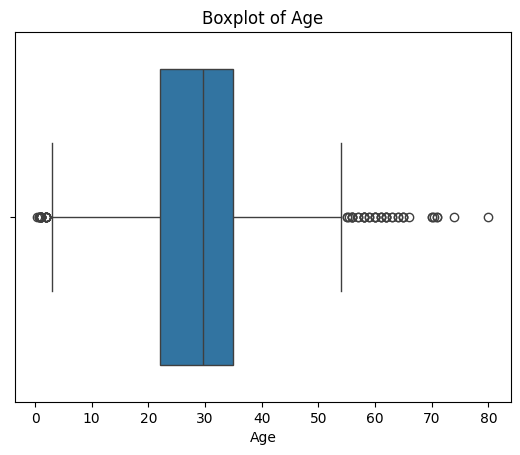

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Age', data=df)
plt.title("Boxplot of Age")
plt.show()

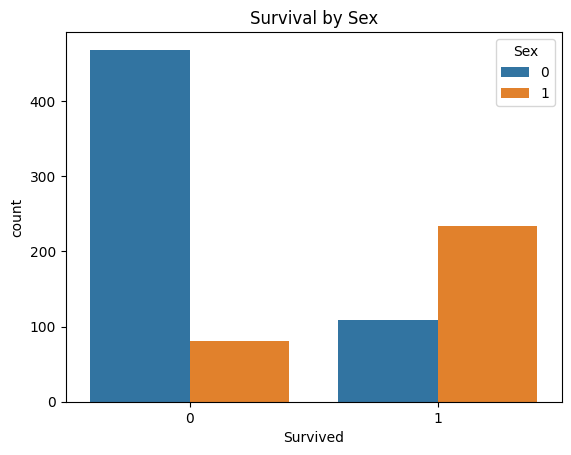

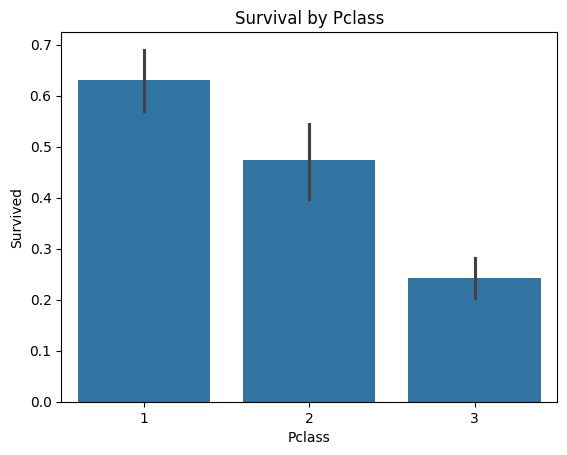

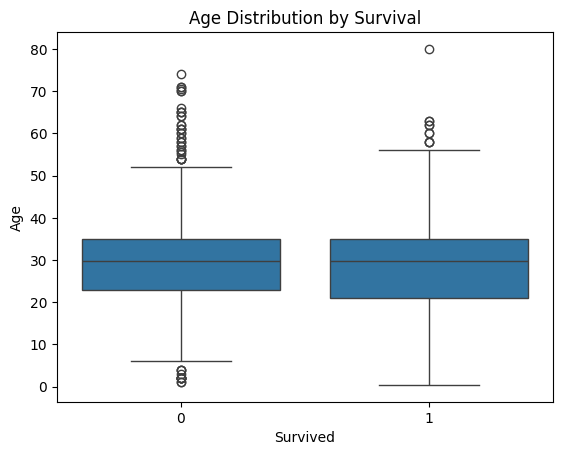

In [ ]:
# Count plot
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.show()

# Bar plot
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival by Pclass")
plt.show()

# Box plot
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
